## 1. Import Libraries and Load Data:

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Try loading the dataset with a different encoding
try:
    data = pd.read_csv('sales_data.csv', encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv('sales_data.csv', encoding='ISO-8859-1')

# Show the first few rows of the dataset
print(data.head())


   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

##  2. Inspect Missing Data

In [11]:
# Check for missing values
missing_data = data.isnull().sum()

# Display the missing data for each column
print(missing_data)

# Calculate the percentage of missing values in each column
missing_percentage = (missing_data / len(data)) * 100
print(missing_percentage)


ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64
ORDERNUMBER          0.000000
QUANTITYORDERED      0.000000
PRICEEACH            0.000000
ORDERLINENUMBER      0.000000
SALES                0.000000
ORDERDATE            0.000000
STATUS               0.000000
QTR_ID               0.000000
MONTH_ID             0.000000
YEAR_ID              0.000000
PRODUCTLINE          0.000000
MSRP                 0.000000
PR

## 3. Handle Missing Data

In [12]:
# Drop rows with missing values in critical columns like STATE and POSTALCODE
data = data.dropna(subset=['STATE', 'POSTALCODE'])

# Alternatively, fill missing values in ADDRESSLINE2, if necessary, with 'N/A'
data['ADDRESSLINE2'].fillna('N/A', inplace=True)

# Fill missing values in the TERRITORY column with 'Unknown' (if it's categorical)
data['TERRITORY'].fillna('Unknown', inplace=True)

# Verify the missing data has been handled
print(data.isnull().sum())


ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
ADDRESSLINE2        0
CITY                0
STATE               0
POSTALCODE          0
COUNTRY             0
TERRITORY           0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64


## 4. Data Cleaning and Preprocessing

### Remove Duplicates: Check for and remove any duplicate rows and Ensure Correct Data Types

In [14]:
# Remove duplicate rows
data = data.drop_duplicates()

# Convert ORDERDATE to datetime
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'], errors='coerce')

# Ensure the SALES and PRICEEACH columns are numeric
data['SALES'] = pd.to_numeric(data['SALES'], errors='coerce')
data['PRICEEACH'] = pd.to_numeric(data['PRICEEACH'], errors='coerce')

# Verify the cleaned data
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1261 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       1261 non-null   int64         
 1   QUANTITYORDERED   1261 non-null   int64         
 2   PRICEEACH         1261 non-null   float64       
 3   ORDERLINENUMBER   1261 non-null   int64         
 4   SALES             1261 non-null   float64       
 5   ORDERDATE         1261 non-null   datetime64[ns]
 6   STATUS            1261 non-null   object        
 7   QTR_ID            1261 non-null   int64         
 8   MONTH_ID          1261 non-null   int64         
 9   YEAR_ID           1261 non-null   int64         
 10  PRODUCTLINE       1261 non-null   object        
 11  MSRP              1261 non-null   int64         
 12  PRODUCTCODE       1261 non-null   object        
 13  CUSTOMERNAME      1261 non-null   object        
 14  PHONE             1261 non-nu

## 5. Exploratory Data Analysis (EDA)

### Total Sales Calculation

In [15]:
# Sum total sales by order
total_sales = data.groupby('ORDERNUMBER')['SALES'].sum().reset_index()

# Display the total sales by order
print(total_sales.head())


   ORDERNUMBER     SALES
0        10100  12133.25
1        10102   6864.05
2        10107  25783.76
3        10109  27398.82
4        10113  12398.56


### Top Products by Sales

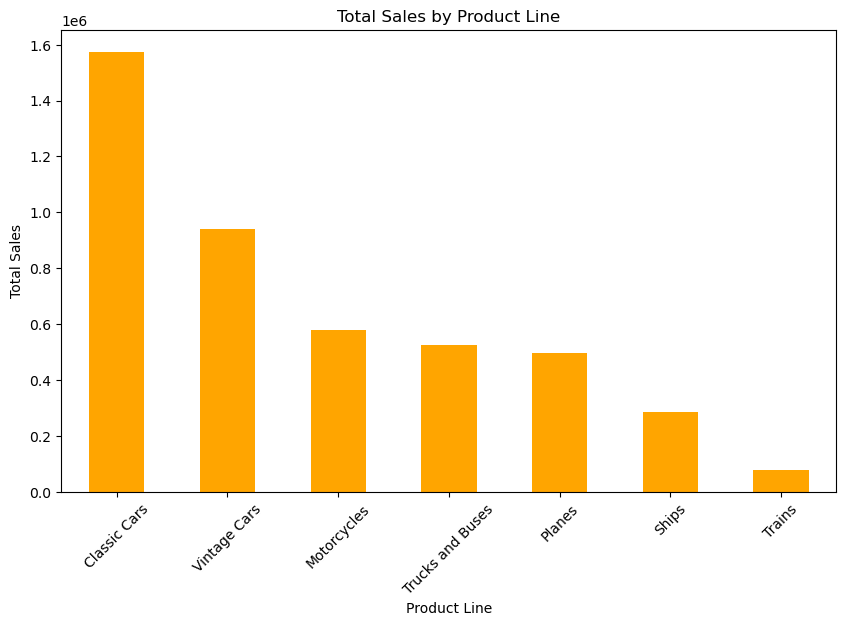

In [16]:
# Group by PRODUCTLINE to get total sales per product line
product_sales = data.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)

# Plot the top-selling products
plt.figure(figsize=(10, 6))
product_sales.plot(kind='bar', color='orange')
plt.title('Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


### Sales Trends Over Time

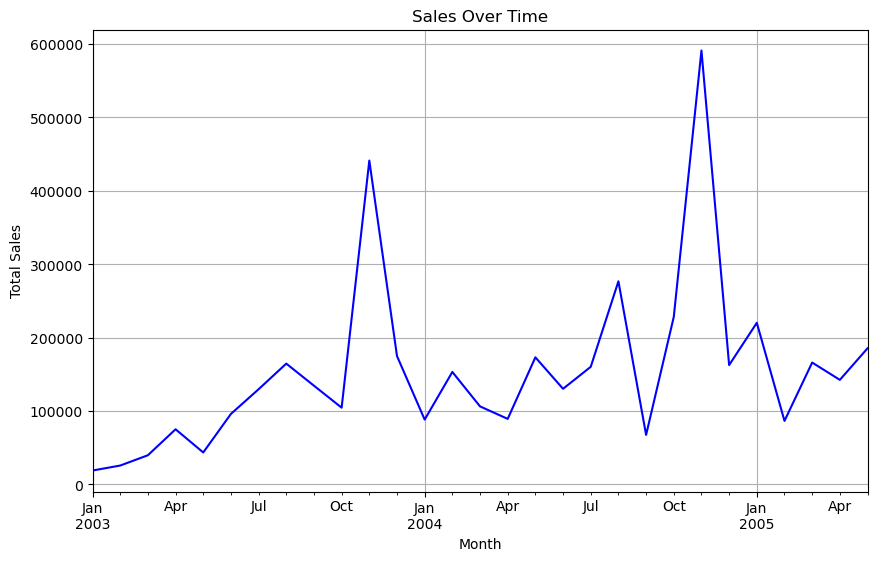

In [17]:
# Group by month and year
data['YearMonth'] = data['ORDERDATE'].dt.to_period('M')
sales_by_month = data.groupby('YearMonth')['SALES'].sum()

# Plot sales over time
plt.figure(figsize=(10, 6))
sales_by_month.plot(kind='line', color='blue')
plt.title('Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


### Sales by Territory

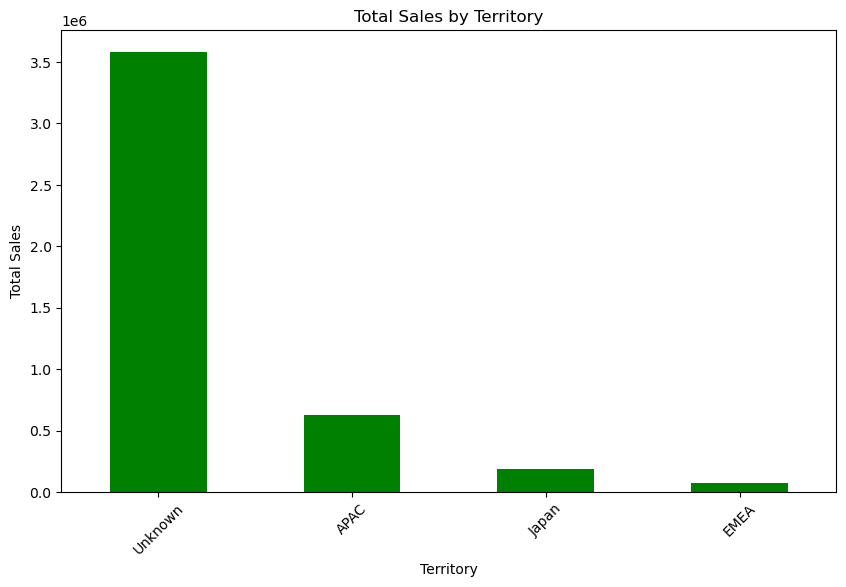

In [18]:
# Group by TERRITORY and sum the sales
sales_by_territory = data.groupby('TERRITORY')['SALES'].sum().sort_values(ascending=False)

# Plot the sales by territory
plt.figure(figsize=(10, 6))
sales_by_territory.plot(kind='bar', color='green')
plt.title('Total Sales by Territory')
plt.xlabel('Territory')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


### Sales by Customer

CUSTOMERNAME
Mini Gifts Distributors Ltd.    654858.06
Australian Collectors, Co.      200995.41
Muscle Machine Inc              197736.94
Land of Toys Inc.               164069.44
The Sharp Gifts Warehouse       160010.27
Anna's Decorations, Ltd         153996.13
Souveniers And Things Co.       151570.98
Online Diecast Creations Co.    131685.30
Diecast Classics Inc.           122138.14
Technics Stores Inc.            120783.07
Name: SALES, dtype: float64


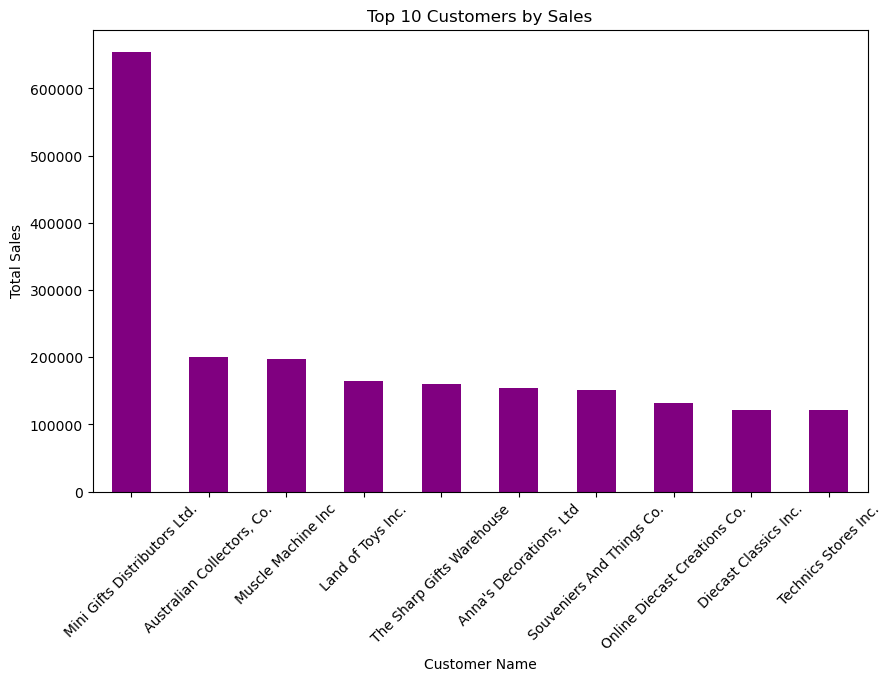

In [19]:
# Group by CUSTOMERNAME and sum the sales
sales_by_customer = data.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False)

# Display the top 10 customers by sales
print(sales_by_customer.head(10))

# Plot the top customers
plt.figure(figsize=(10, 6))
sales_by_customer.head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Customers by Sales')
plt.xlabel('Customer Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


## 6. Insights and Reporting

### Key Insights:

1. **Top Products**: Certain **PRODUCTLINE** categories are generating significantly more revenue than others. Focus on these product lines to drive more sales.
   
2. **Sales Trends**: Sales appear to be increasing steadily over time. It is important to identify the months with the highest and lowest sales to optimize inventory.

3. **Territory Insights**: Sales performance is higher in some territories. Focus on marketing and promotional efforts in these regions.

4. **Customer Insights**: A small group of customers contribute to the majority of the sales. Consider loyalty programs or offers to retain these customers.

---

### Recommendations:

1. **Target High-Performing Territories**: Focus your marketing campaigns on regions with high sales, and explore opportunities in underperforming areas.
2. **Improve Customer Retention**: Given that a few customers contribute most sales, build strategies to retain and upsell them.
3. **Optimize Inventory for Top-Selling Products**: Ensure you stock enough of your top-selling products, especially in peak sales months.



## 7. Save Visualizations and Export Results

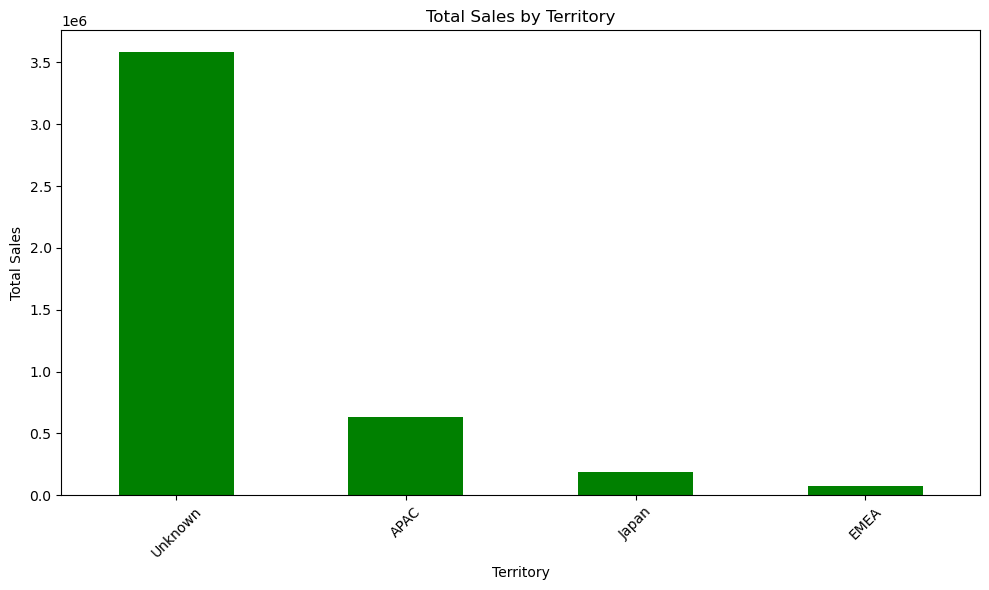

In [20]:
# Save a plot as an image file
plt.figure(figsize=(10, 6))
sales_by_territory.plot(kind='bar', color='green')
plt.title('Total Sales by Territory')
plt.xlabel('Territory')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('sales_by_territory.png')


### Check for missing values:

In [5]:
# Check for missing values
data.isnull().sum()


ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

### Fill or remove missing values (if necessary):

In [6]:
# Fill missing values with a placeholder or remove rows/columns with missing data
data = data.fillna(0)  # Example: Fill NaNs with 0


### Convert columns to the correct data types:

In [8]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])


KeyError: 'Date'